<a href="https://colab.research.google.com/github/DmitrijLeontev/Dmitrij_Leontev/blob/main/DzDatascience/Lite_9_%D1%80%D0%B0%D0%B7%D0%BD%D1%8B%D1%85_%D0%BD%D1%81_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дорогой студент!

В домашнем задании Lite вам предлагается поработать подробнее с параметрами словаря и формированием гиперпараметров нейронной сети. Создайте 9 нейросетей с различными гиперпараметрами (см. пунтк 2 и 3)

 Для этого необходимо:

  1. Воссоздать ноутбук, аналогичный ноутбуку практической части №1, загрузив при этом необходимую нам базу (код уже доступен в ноутбуке).

  2. Задать в ноутбуке следующие параметры для размера словаря, ширины окна и шага:

    - Размер словаря - от 10000 до 20000 (выбрать меньшее значение диапазона, если будет перегрузка ОЗУ и перезапуск подключения к Colaboratory)
    - Ширина окна - от 1000 до 2000
    - Шаг - от 100 до 500 (на обучение лучше влияет наименьший шаг, но это может перегрузить ОЗУ).

  3. Создать архитектуру сети и задать гиперпараметры. Можно воспользоваться шаблоном:
  
   - Добавьте модель прямого распространения **Sequential()**
   - Добавьте один или несколько полносвязных (**Dense**) слоёв
   - Добавьте слои **Dropout()** и **BatchNormalization()**
   - Добавьте выходной полносвязный слой с количеством нейронов, соответствующим количеству классов (число писателей)
  
   Напомним, что точность сети можно проверить по значению показателя 'val_accuracy' на конце каждой эпохи.
   

In [ ]:
# Загрузка датасетов из облака google
import gdown

In [ ]:
# Загрузка датасета из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l7/writers.zip', None, quiet=True)

'writers.zip'

In [ ]:
# Ваше задание здесь
# Работа с массивами данных
import numpy as np

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Функции операционной системы
import os

# Работа со временем
import time

# Регулярные выражения
import re

# Запись в файлы и чтение из файлов структур данных Python
import pickle

# Отрисовка графиков
import matplotlib.pyplot as plt

%matplotlib inline

Команды, именуемые «магическими» предназначены для выполнения кода непосредственно в консоли или ячейке вашего ноутбука. Они начинаются с символа восклицательного знака – !.

Далее !unzip распаковывает архив в папку с именем указанным после ключа -d (в нашем случае папка writers)

С помощью команды !ls мы выводим содержимое папки (`writers') на экран

Теперь все файлы для работы в вашем распоряжении!

In [ ]:
# Распаковка архива в папку writers
!unzip -qo writers.zip -d writers/

# Просмотр содержимого папки
!ls writers

'(Булгаков) Обучающая_5 вместе.txt'	    '(О. Генри) Обучающая_50 вместе.txt'
'(Булгаков) Тестовая_2 вместе.txt'	    '(О. Генри) Тестовая_20 вместе.txt'
'(Клиффорд_Саймак) Обучающая_5 вместе.txt'  '(Рэй Брэдберри) Обучающая_22 вместе.txt'
'(Клиффорд_Саймак) Тестовая_2 вместе.txt'   '(Рэй Брэдберри) Тестовая_8 вместе.txt'
'(Макс Фрай) Обучающая_5 вместе.txt'	    '(Стругацкие) Обучающая_5 вместе.txt'
'(Макс Фрай) Тестовая_2 вместе.txt'	    '(Стругацкие) Тестовая_2 вместе.txt'


Важно! Если при распаковке файлов вы видите кракозябры вместо названий, необходимо указать кодировку:

!unzip -qo -O UTF-8 writers.zip -d writers/

Все три переменных ниже содержат названия строчного типа:

Первая – название папки с файлами текстов.
Вторая – слово «обучающая» в названии файла (для поиска в дальнейшем).
Третья – слово «тестовая» в названии файла (также для поиска).

In [ ]:
# Настройка констант для загрузки данных
FILE_DIR  = 'writers'                     # Папка с текстовыми файлами
SIG_TRAIN = 'обучающая'                   # Признак обучающей выборки в имени файла
SIG_TEST  = 'тестовая'                    # Признак тестовой выборки в имени файла

Первые три переменных содержат в себе по пустому списку, что вы видите по пустым квадратным скобкам – [ ].

● CLASS_LIST – в этот список вы поместите имя каждого класса и в итоге получите единый список с именами всех задействованных писателей;

● text_train – в этой переменной в результате будет список, содержащий одну единственную строку: непрерывный текст для обучения сети;

● text_test – аналогично text_train, но с назначением текста для тестирования точности сети.

Первый цикл for просто проходится по всем файлам с текстами в общей папке.

Команда re.match относится к разряду регулярных выражений, которые вы изучите отдельно, поскольку на первый взгляд они могут казаться весьма сложными.

Здесь re.match ищет совпадения в названиях файлов для деления по классам:

● class_name – это имя каждого писателя в названии файла.

● subset_name – наименование выборки (обучающая или тестовая).

re.match выполнит сортировку всех файлов. При этом данный метод ориентируется на строку '((.+)) (\S+)_' на первой позиции в своих параметрах. Это условно кодированные команды для работы с текстом и деления, которое как раз описано выше. Пока что примите этот параметр как данность, впоследствии вы сможете изучить его при желании.

Переменная cls сохраняет в себе список имен всех писателей в виде индексов, а первая и единственная в этом блоке команда print() информирует о распределении файлов по выборкам и создании списка с именами писателей.

Команда-менеджер with удобна для работы с потоком файлов, в вашем случае – с текстами писателей. Она гарантированно сократит количество строк для нужной операции до минимального, а также всегда поможет избежать возможных ошибок кода, которые могли бы случиться при использовании другого способа.

В блоке ниже with открывает каждый текстовый файл в папке и записывает весь текст в единую строку, сохраненную в переменной text. В переменной subset закреплена проверка принадлежности текста либо к обучающей, либо к проверочной выборке, и сразу после добавляет каждый текст к соответствующей выборке, разделив слова текста только пробелами.

len(CLASS_LIST) – сохраняет в переменной CLASS_COUNT общее количество писателей (их 6).

In [ ]:
# Загрузка датасета. Добавляются имена классов и соответствующие тексты.
# Все тексты преобразуются в строку и объединяются для каждого класса и выборки
CLASS_LIST = []
text_train = []
text_test = []

for file_name in os.listdir(FILE_DIR):
    # Выделение имени класса и типа выборки из имени файла
    m = re.match('\((.+)\) (\S+)_', file_name)
    # Если выделение получилось, то файл обрабатывается
    if m:
        class_name = m[1]
        subset_name = m[2].lower()
        # Проверка типа выборки в имени файла
        is_train = SIG_TRAIN in subset_name
        is_test = SIG_TEST in subset_name

        # Если тип выборки обучающая либо тестовая - файл обрабатывается
        if is_train or is_test:
            # Добавление нового класса, если его еще нет в списке
            if class_name not in CLASS_LIST:
                print(f'Добавление класса "{class_name}"')
                CLASS_LIST.append(class_name)
                # Инициализация соответствующих классу строк текста
                text_train.append('')
                text_test.append('')

            # Поиск индекса класса для добавления содержимого файла в выборку
            cls = CLASS_LIST.index(class_name)
            print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}", {subset_name} выборка.')
            with open(f'{FILE_DIR}/{file_name}', 'r') as f:
                # Загрузка содержимого файла в строку
                text = f.read()
            # Определение выборки, куда будет добавлено содержимое
            subset = text_train if is_train else text_test
            # Добавление текста к соответствующей выборке класса. Концы строк заменяются на пробел
            subset[cls] += ' ' + text.replace('\n', ' ')

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

Добавление класса "Булгаков"
Добавление файла "(Булгаков) Тестовая_2 вместе.txt" в класс "Булгаков", тестовая выборка.
Добавление класса "Клиффорд_Саймак"
Добавление файла "(Клиффорд_Саймак) Обучающая_5 вместе.txt" в класс "Клиффорд_Саймак", обучающая выборка.
Добавление файла "(Клиффорд_Саймак) Тестовая_2 вместе.txt" в класс "Клиффорд_Саймак", тестовая выборка.
Добавление класса "О. Генри"
Добавление файла "(О. Генри) Тестовая_20 вместе.txt" в класс "О. Генри", тестовая выборка.
Добавление класса "Стругацкие"
Добавление файла "(Стругацкие) Тестовая_2 вместе.txt" в класс "Стругацкие", тестовая выборка.
Добавление класса "Рэй Брэдберри"
Добавление файла "(Рэй Брэдберри) Тестовая_8 вместе.txt" в класс "Рэй Брэдберри", тестовая выборка.
Добавление класса "Макс Фрай"
Добавление файла "(Макс Фрай) Тестовая_2 вместе.txt" в класс "Макс Фрай", тестовая выборка.
Добавление файла "(Булгаков) Обучающая_5 вместе.txt" в класс "Булгаков", обучающая выборка.
Добавление файла "(Стругацкие) Обучающая_5

Итого:

● у вас есть 6 имен писателей – названия для каждого класса (первая строка);

● в наличии 6 текстов в обучающей выборке (вторая строка);

● количество символов одного из текстов равно 1 049 518 (третья строка).

In [ ]:
# Прочитанные классы текстов
print(CLASS_LIST)

# Количество текстов в обучающей выборке
print(len(text_train))

# Количество символов в одном из текстов обучающей выборки
print(len(text_train[3]))

['Булгаков', 'Клиффорд_Саймак', 'О. Генри', 'Стругацкие', 'Рэй Брэдберри', 'Макс Фрай']
6
2042470


Посмотрите начало каждого текста из обучающей выборки:

In [ ]:
# Проверка загрузки: вывод начальных отрывков из каждого класса
for cls in range(CLASS_COUNT):
    print(f'Класс: {CLASS_LIST[cls]}')
    print(f'  train: {text_train[cls][:200]}')
    print(f'  test : {text_test[cls][:200]}')
    print()

Класс: Булгаков
  train:  ﻿Белая гвардия   Посвящается[1]  Любови Евгеньевне Белозерской[2]  Пошел мелкий снег и вдруг повалил хло-  пьями. Ветер завыл; сделалась метель.  В одно мгновение темное небо смешалось с  снежным мор
  test :  ﻿Дон Кихот ДЕЙСТВУЮЩИЕ ЛИЦА Алонсо Кихано, он же Дон Кихот Ламанчский.  Антония – его племянница.  Ключница Дон Кихота.  Санчо Панса – оруженосец Дон Кихота.  Перо Перес – деревенский священник, лице

Класс: Клиффорд_Саймак
  train:  ﻿Всё живое...     Когда я выехал из нашего городишка и повернул на шоссе, позади оказался грузовик. Этакая тяжелая громадина с прицепом, и неслась она во весь дух. Шоссе здесь срезает угол городка, и
  test :  ﻿Зачарованное паломничество    1  Гоблин со стропил следил за прячущимся монахом, который шпионил за ученым. Гоблин ненавидел монаха и имел для этого все основания. Монах никого не ненавидел и не люб

Класс: О. Генри
  train:  «Лиса-на-рассвете»   Коралио нежился в полуденном зное, как томная красавица в сурово хранимо

Теперь вы узнаете, как превратить текст из последовательного набора слов в последовательный набор чисел.

Преобразование текстовых данных в числовые и векторные представления для обучения нейросети

понадобится более объемный словарь.

Это будет переменная VOCAB_SIZE, равная 20 000 индексам слов.

Так вы выбрали общий размер словаря, а посредством WIN_SIZE = 1000 вы задаете размер каждой подвыборки внутри общей базы. Так сколько же тогда вы получите подвыборок?

20 000 : 1000 = 20

20 примеров для обучения!

WIN_HOP = 100 – шаг или же попросту количество слов, на которое будет смещаться словарь от начала общего списка до самого конца, чтобы получить отличающиеся подвыборки.

In [ ]:
# Задание параметров преобразования
VOCAB_SIZE = 20000                        # Объем словаря для токенизатора
WIN_SIZE   = 1000                         # Длина отрезка текста (окна) в словах
WIN_HOP    = 100                          # Шаг окна разбиения текста на векторы

 В блоке ниже создан класс timex, в основе которого лежит модуль для работы с реальным временем time.

timex используют для измерения времени выполнения дальнейших операций.

Важно: time.time() засекает текущее время, а {:.2f} в форматированной строке выводит время в виде десятичной дроби с двумя знаками (2f) после запятой.

In [ ]:
# Контекстный менеджер для измерения времени операций
# Операция обертывается менеджером с помощью оператора with
class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} с'.format(time.time() - self.t))

Далее выполняется та же операция по формированию словаря частотности, только его объем уже равен значению VOCAB_SIZE, а это 20 000.

Менеджер with поможет гладко обработать весь блок кода со словарем с помощью timex(). Так вы узнаете время обработки всего диапазона слов токенайзером. Учитывайте, что токенайзер еще не преобразует всю выборку сразу в одни лишь индексы (числовые значения), а формирует пары «слово: индекс».

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
with timex():
    # Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                          lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

    # Использованы параметры:
    # num_words   - объем словаря
    # filters     - убираемые из текста ненужные символы
    # lower       - приведение слов к нижнему регистру
    # split       - разделитель слов
    # char_level  - указание разделять по словам, а не по единичным символам
    # oov_token   - токен для слов, которые не вошли в словарь

    # Построение частотного словаря по обучающим текстам
    tokenizer.fit_on_texts(text_train)

    # Построение словаря в виде пар слово - индекс
    items = list(tokenizer.word_index.items())

Время обработки: 2.69 с


In [ ]:
# Вывод нескольких наиболее часто встречающихся слов
print(items[:120])

# Размер словаря может быть больше, чем num_words, но при преобразовании в последовательности
# и векторы bag of words будут учтены только первые num_words слов
print("Размер словаря", len(items))

[('неизвестное_слово', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10), ('как', 11), ('то', 12), ('это', 13), ('но', 14), ('все', 15), ('у', 16), ('по', 17), ('его', 18), ('к', 19), ('так', 20), ('мне', 21), ('из', 22), ('за', 23), ('меня', 24), ('ты', 25), ('же', 26), ('бы', 27), ('сказал', 28), ('вы', 29), ('было', 30), ('от', 31), ('они', 32), ('мы', 33), ('только', 34), ('да', 35), ('еще', 36), ('она', 37), ('о', 38), ('вот', 39), ('когда', 40), ('если', 41), ('уже', 42), ('был', 43), ('нет', 44), ('ни', 45), ('их', 46), ('ну', 47), ('чтобы', 48), ('до', 49), ('для', 50), ('ему', 51), ('ничего', 52), ('может', 53), ('или', 54), ('даже', 55), ('там', 56), ('очень', 57), ('кто', 58), ('ее', 59), ('тут', 60), ('потом', 61), ('просто', 62), ('чем', 63), ('него', 64), ('быть', 65), ('теперь', 66), ('под', 67), ('где', 68), ('нас', 69), ('есть', 70), ('тебя', 71), ('ли', 72), ('время', 73), ('тебе', 74), ('вас', 75), ('со', 76), ('нибудь

In [ ]:
# Проверка индекса слова в словаре
try:
    print('Интересующее слово имеет индекс:', tokenizer.word_index[input('Введите слово: ')])
except:
    print('Интересующего вас слова нет в словаре')

Введите слово: здравствуй
Интересующее слово имеет индекс: 7649


А далее вы как раз преобразуете текст в чистую последовательность индексов по частоте повторений слов. Вы это рассматривали немного раньше в занятии.

In [ ]:
# Преобразование обучающих и проверочных текстов в последовательность индексов согласно частотному словарю
with timex():
    seq_train = tokenizer.texts_to_sequences(text_train)
    seq_test = tokenizer.texts_to_sequences(text_test)

    print("Фрагмент обучающего текста:")
    print("В виде оригинального текста:              ", text_train[1][:101])
    print("Он же в виде последовательности индексов: ", seq_train[1][:20])

Фрагмент обучающего текста:
В виде оригинального текста:                ﻿Всё живое...     Когда я выехал из нашего городишка и повернул на шоссе, позади оказался грузовик. 
Он же в виде последовательности индексов:  [142, 2904, 40, 5, 11721, 22, 513, 1, 2, 1817, 7, 941, 956, 593, 2195, 12030, 4602, 1, 8, 1]
Время обработки: 2.92 с



Рассмотрите функцию вывода статистики по всем загруженным текстам – print_text_stats(), которая:

Задает название выборки (параметр title – «обучающая» или «тестовая»).
Отдельно проходит по каждому тексту (параметр texts).
Проходит по сформированным последовательностям индексов слов (параметр sequences).
Выводит количество символов каждого текста (счетчик переменной chars).
Выводит количество слов каждого текста (счетчик переменной words).
Суммирует все символы и слова в каждой выборке целиком (последняя строка в коде функции).
Обратите внимание на вывод функции.

In [ ]:
# Функция вывода статистики по текстам
def print_text_stats(title, texts, sequences, class_labels=CLASS_LIST):
    # Суммарное количество символов и слов в тексте
    chars = 0
    words = 0

    print(f'Статистика по {title} текстам:')

    # Вывод итогов по всем классам данного набора текстов и их последовательностей индексов
    for cls in range(len(class_labels)):
        print('{:<15} {:9} символов,{:8} слов'.format(class_labels[cls],
                                                      len(texts[cls]),
                                                      len(sequences[cls])))
        chars += len(texts[cls])
        words += len(sequences[cls])

    print('----')
    print('{:<15} {:9} символов,{:8} слов\n'.format('В сумме', chars, words))

# Вывод итогов по текстам
print_text_stats('обучающим', text_train, seq_train)
print_text_stats('тестовым', text_test, seq_test)

Статистика по обучающим текстам:
Булгаков          1765649 символов,  261465 слов
Клиффорд_Саймак   1609508 символов,  251502 слов
О. Генри          1049518 символов,  160607 слов
Стругацкие        2042470 символов,  313012 слов
Рэй Брэдберри     1386455 символов,  214454 слов
Макс Фрай         3700011 символов,  568533 слов
----
В сумме          11553611 символов, 1769573 слов

Статистика по тестовым текстам:
Булгаков           875043 символов,  132730 слов
Клиффорд_Саймак    318812 символов,   50360 слов
О. Генри           349663 символов,   53238 слов
Стругацкие         704847 символов,  108621 слов
Рэй Брэдберри      868674 символов,  132524 слов
Макс Фрай         1278192 символов,  196731 слов
----
В сумме           4395231 символов,  674204 слов



Создание обучающей и проверочной выборок

Функция split_sequence поможет поделить одну общую последовательность (параметр sequence) из индексов слов на то количество примеров, которые вы захотите (параметр win_size) со сдвигом по всей выборке, равному размеру шага (параметр hop). Вы делали то же с помощью вложенного в список цикла for, только теперь он задан как результат работы функции. Кто знает, сколько раз вам придется к этому прибегать, поэтому лучше сделать функцию!

Есть и вторая функция – vectorize_sequence(), которая полезна двумя операциями:

деление общей последовательности на части с помощью функции split_sequence();

формирование бинарных (содержащих только 0 и 1) последовательностей верных ответов в соответствии с каждым примером для тренировочной и для тестовой выборок (метод to_categorical()).

Тогда в результате использования vectorize_sequence() вы всегда получите два готовых numpy-массива. Если подадите в функцию данные для обучения, то это будет обучающая выборка и выборка ответов для нее. То же будет и в случае с формированием массивов на основе тестовых данных.

In [ ]:
# Функция разбиения последовательности на отрезки скользящим окном
# На входе - последовательность индексов, размер окна, шаг окна
def split_sequence(sequence, win_size, hop):
    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]


# Функция формирования выборок из последовательностей индексов
# формирует выборку отрезков и соответствующих им меток классов в виде one hot encoding
def vectorize_sequence(seq_list, win_size, hop):
    # В списке последовательности следуют в порядке их классов
    # Всего последовательностей в списке ровно столько, сколько классов
    class_count = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(class_count):
        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)
        # Добавление отрезков в выборку
        x += vectors
        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, class_count)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)

Сформируйте выборки, посмотрите на их размер и заодно измерьте время выполнения операции. Последнее может отличаться в зависимости от среды выполнения и мощностей ПК:

In [ ]:
# Формирование обучающей и тестовой выборок
with timex():
    # Формирование обучающей выборки
    x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP)
    # Формирование тестовой выборки
    x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

    # Проверка формы сформированных данных
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)

(17640, 1000) (17640, 6)
(6686, 1000) (6686, 6)
Время обработки: 1.54 с


Один из примеров последовательности индексов для обучения сети выглядит так:

In [ ]:
# Вывод отрезка индексов тренировочной выборки
print(x_train[0])

[ 2927  5383     1  1496     1     1 15510  1511   353  8288  1255     2
   121 14307     1     1   675 11508 10220 17013     3   275  1066  4725
   637     1     8     1  6482    15  2782    47     1  1181     1  1636
     1  1540     1  7010     2     1    94  3211   930    17     1     3
  5197 18830     8  3906   532  5765    43   488     2  8682   488    17
     1     1  2692    31   505    26  4242   548  2381    43     9     1
  2834  3437    10     1  4591     2   597  1966     3  1217   800   392
  1829  4592     1     1     1     2  2298 18831  4243  2989    14   839
     2     3 18832     2     3 14308   924 14309    11  8683     2  3438
     1  3745     4  3907    11     3     1     1 10855   935  6255     1
    38     1  1359   321  9134  4591     2 17014  1192 10856  4465    68
    26    25  3155   103   488   127    97    11  2232  1050  3592     1
     8 15511     1     1     1  3824     2     3   570  1200    40  1310
  1067  4343  3593   762  3746   127     1     1  3

Сформируйте отдельные обучающую и тестовую выборки в формате Bag Of Words, чтобы в дальнейшем использовать оба способа обработки текстов при обучении НС. И узнайте время выполнения этих двух операций:

In [ ]:
# Формирование выборок текстов в виде разреженных матриц (bag of words)
with timex():
    # На входе .sequences_to_matrix() ожидает список, .tolist() выполняет преобразование типа
    x_train_01 = tokenizer.sequences_to_matrix(x_train.tolist())
    x_test_01 = tokenizer.sequences_to_matrix(x_test.tolist())

    # Вывод формы обучающей выборки в виде разреженной матрицы Bag of Words
    print(x_train_01.shape)
    # Вывод фрагмента отрезка обучающего текста в виде Bag of Words
    print(x_train_01[0][0:100])

(17640, 20000)
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0.]
Время обработки: 11.49 с


Различные архитектуры нейронных сетей для классификации текста
Сервисные функции
Пусть код ниже не вводит вас в ступор, там просто добавлена пара созданных функций для удобства компиляции и обучения модели. Именно это и будет делать функция под именем compile_train_model(). В ее параметры вы передадите все, что необходимо для компиляции и обучения:

● саму модель НС;

● выборки;

● функцию оптимизации;

● количество эпох обучения;

● размер шага по выборке;

● размер полотна графика.

Да, функция даже нарисует для вас графики точности и ошибки сети! Не зря вы познакомились с библиотекой matplotlib (блок кода по отрисовке графиков последний в данной функции).

Также в ячейке ниже написана функция eval_model(). Она оценивает точность работы сети при распознавании текстов, дает статистику по верно и неверно распознанным классам, и рисует график-матрицу ошибки предсказания сети! Это очень красивый график, похожий на яркую шахматную доску. Как его правильно читать, вы узнаете чуть позже.

Последняя функция compile_train_eval_model() объединяет в себе функционал двух предыдущих. Ей вы и будете пользоваться, чтобы в будущем строить разные архитектуры, при этом в одну строку задавая компиляцию модели, обучение и оценку точности!

In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):
    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

Попробуйте способ обучения сети на Bag Of Words. Сеть будет угадывать одного из шести авторов для каждого примера текста. На выходном слое нужно указать функцию активации softmax.

Соберите полносвязную модель, подобную той, что вы уже рассматривали на первом занятии по НС. А на обучение и тест сети подайте выборки формата Bag Of Words (x_train_01 и x_test_01), которые вы подготовили ранее.

Функция compile_train_eval_model() также выведет статистику по сформированной модели до начала обучения. Смотрите:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               4000200   
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 6)                 1206      
                                                                 
Total params: 4002206 (15.27 MB)
Trainable params: 4001806 (15.27 MB)
Non-trainable params: 400 (1.56 KB)
_________________________________________________________________
Epoch 1/50
138/138 [==============================] - 7s 26ms/step - loss: 0.0456 

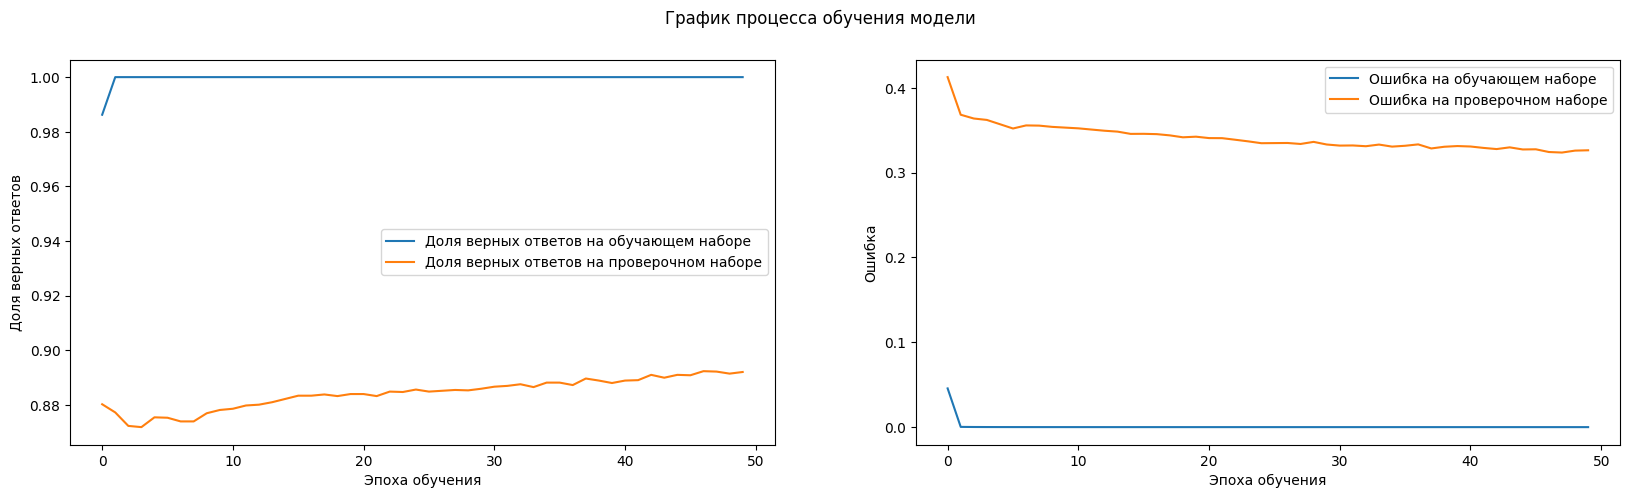

209/209 [==============================] - 1s 2ms/step


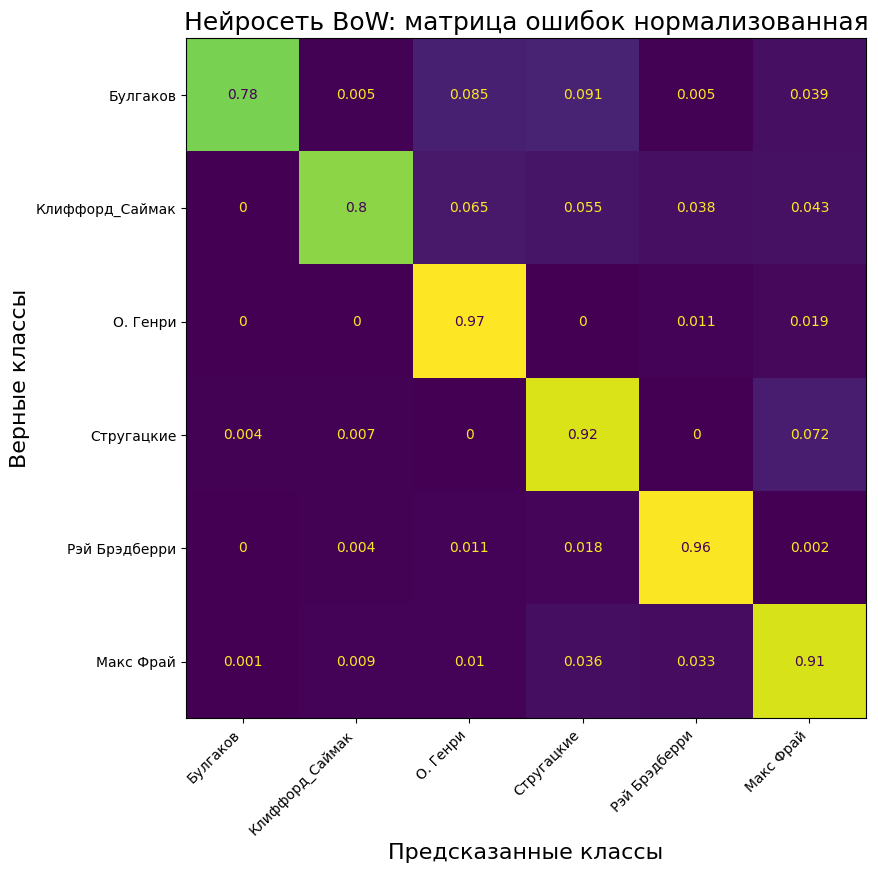

----------------------------------------------------------------------------------------------------
Нейросеть: BoW
Класс: Булгаков              78% сеть отнесла к классу Булгаков             - ВЕРНО :-)
Класс: Клиффорд_Саймак       80% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: О. Генри              97% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Стругацкие            92% сеть отнесла к классу Стругацкие           - ВЕРНО :-)
Класс: Рэй Брэдберри         96% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Макс Фрай             91% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)

Средняя точность распознавания:  89%


In [ ]:
# Создание последовательной модели нейросети
model_text_bow_softmax = Sequential()
# Первый полносвязный слой
model_text_bow_softmax.add(Dense(200, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.25))
# Слой пакетной нормализации
model_text_bow_softmax.add(BatchNormalization())
# Выходной полносвязный слой
model_text_bow_softmax.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_softmax,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         class_labels=CLASS_LIST,
                         title='BoW')

Выводы по итогам обучения модели BagOfWords

По информации на эпохах и по графикам процесса обучения вы можете увидеть, что уже со второй эпохи доля верных ответов и ошибка на обучающей выборке выходят на плато, т.е. достигают предела в обучении и больше не меняются. На проверочной выборке точность имеет тенденцию к легкому росту, а ошибка – к едва заметному снижению. В целом получился хороший результат, и функция сообщает вам, что точность распознавания текстов данной НС – 90%.

А как же прочесть график-матрицу, демонстрирующий точность сети? По вертикали даны верные имена авторов, а по горизонтали – предсказанные имена. В сети с хорошей точностью вы должны видеть яркую диагональ из верхнего левого угла в нижний правый, в значениях которой будут дробные числа, близкие к единице. Это характеризует точность предсказанных результатов. Именно такой исход вы и наблюдаете на графике- матрице ошибок по данной модели!

Пример сохранения модели в файл для дальнейшего использования:

In [ ]:
# Сохранение полной модели (архитектуры слоев и весов каждого слоя)
# Для чтения модели используется метод keras.models.load_model()
model_text_bow_softmax.save('model_text_bow_softmax.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 Embedding. Как вы помните, этот слой создает из каждого индекса слова отдельный вектор числовых значений, размер которого равен параметру, указываемому при создании слоя в архитектуре.

Первая модель Embedding создаст для каждого слова в выборке вектор из 20 значений. Размер вектора, который создает слой, указывается в параметре output_dim. Это довольно малый размер, сеть обучится быстро, но и точность может оказаться невысокой. Параметр input_dim указывает количество уникальных значений (токенов), который данных слой будет способен обработать (если мы установим значение input_dim = N и подадим токен больше чем N, этот слой выдаст ошибку, по скольку у него не будут нужные веса для обработки этого токена).

Для работы с Embedding вы подадите выборки, созданные до преобразования в Bag Of Words – просто x_train и x_test:

Embedding + Dense: размерность эмбеддингов 20

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 20)          400000    
                                                                 
 spatial_dropout1d (Spatial  (None, 1000, 20)          0         
 Dropout1D)                                                      
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 batch_normalization_1 (Bat  (None, 20000)             80000     
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 200)               4000200   
                                                                 
 dropout_1 (Dropout)         (None, 200)              

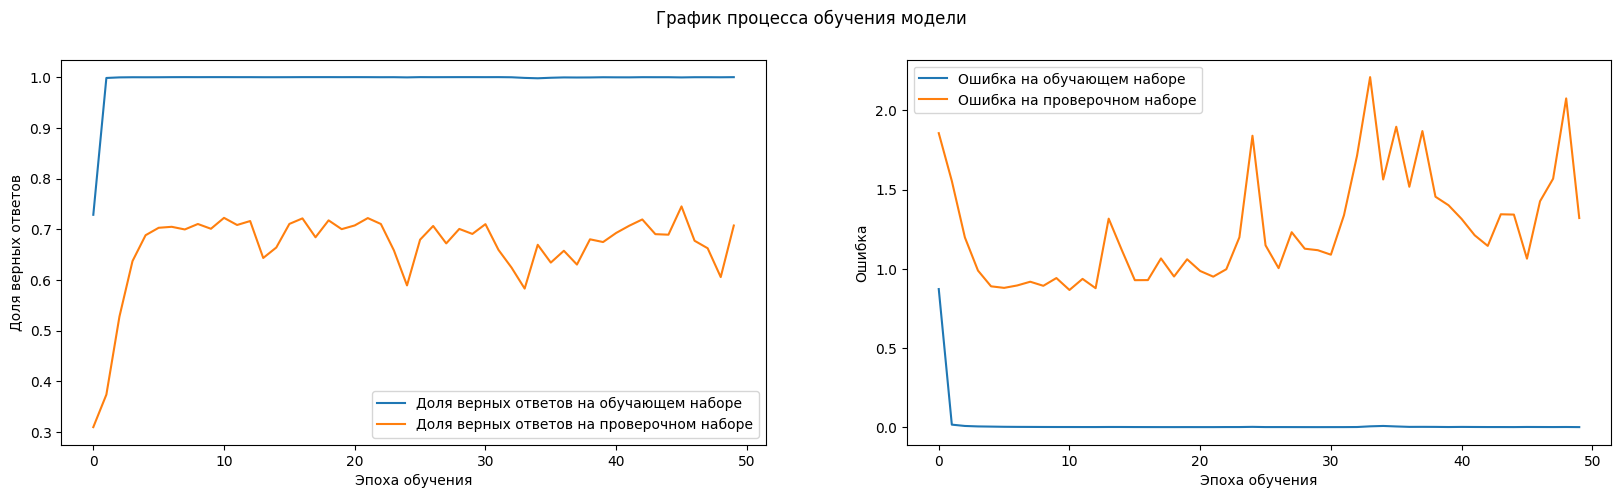

209/209 [==============================] - 0s 2ms/step


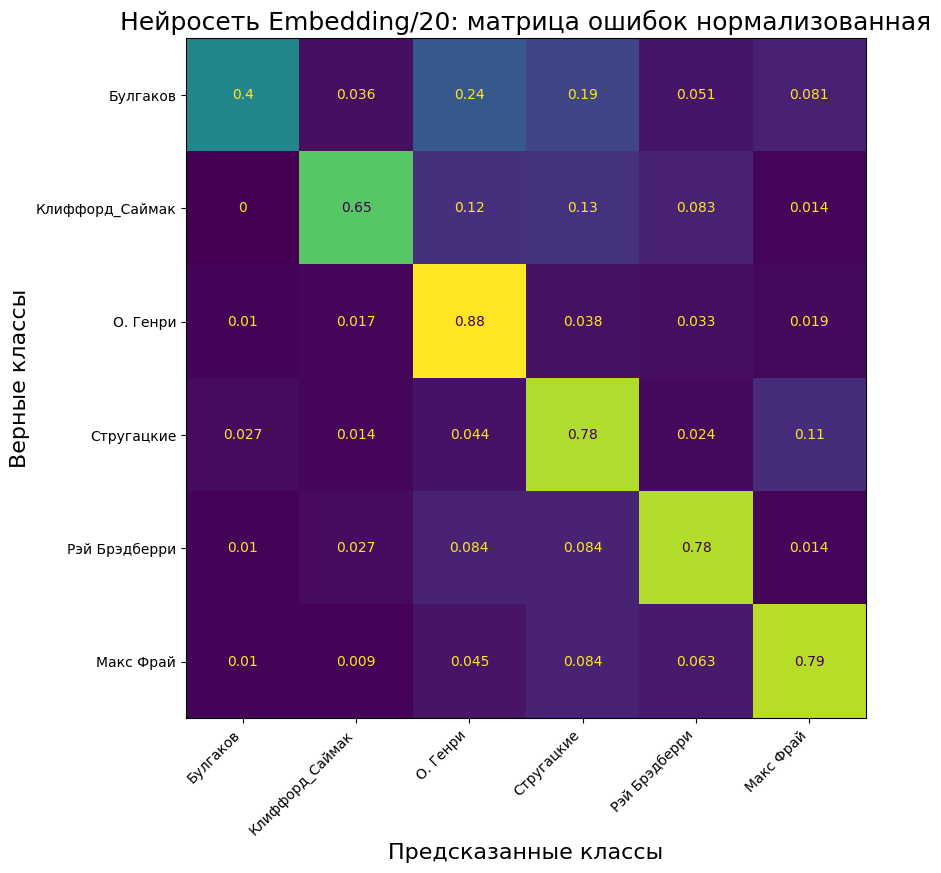

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding/20
Класс: Булгаков              40% сеть отнесла к классу Булгаков             - ВЕРНО :-)
Класс: Клиффорд_Саймак       65% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: О. Генри              88% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Стругацкие            78% сеть отнесла к классу Стругацкие           - ВЕРНО :-)
Класс: Рэй Брэдберри         78% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Макс Фрай             79% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)

Средняя точность распознавания:  72%


In [ ]:
# Архитектура со слоем Embedding и регуляризацией
model_text_emb_20 = Sequential()
model_text_emb_20.add(Embedding(input_dim = VOCAB_SIZE, output_dim = 20, input_length=WIN_SIZE))
model_text_emb_20.add(SpatialDropout1D(0.2))
model_text_emb_20.add(Flatten())
model_text_emb_20.add(BatchNormalization())
model_text_emb_20.add(Dense(200, activation="relu"))
model_text_emb_20.add(Dropout(0.2))
model_text_emb_20.add(BatchNormalization())
model_text_emb_20.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде последовательностей индексов,
# а не векторов bag of words
compile_train_eval_model(model_text_emb_20,
                         x_train, y_train,
                         x_test, y_test,
                         class_labels=CLASS_LIST,
                         title='Embedding/20')

Выводы по итогам обучения модели Embedding(20) + Dense

Посмотрите на графики и данные по эпохам. Точность и ошибка на проверочном наборе нарисовали пилу, хотя на обучающем по-прежнему полный штиль. Однако график матрицы ошибок не даст вам себя обмануть: вы видите, как изменилась тональность на диагонали и как упали значения точности. И правда, на последней эпохе сеть дала точность распознавания 70%. Результат модели Embedding пока что сильно уступает Bag Of Words.

Посмотрите, как изменится точность, если увеличить размер Embedding-пространства до 200, а также добавить новый слой одномерной регуляризации SpatialDropout1D.

Embedding + Dense: размерность эмбеддингов 200

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 200)         4000000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 1000, 200)         0         
 alDropout1D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 200000)            0         
                                                                 
 batch_normalization_3 (Bat  (None, 200000)            800000    
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 200)               40000200  
                                                                 
 dropout_2 (Dropout)         (None, 200)              

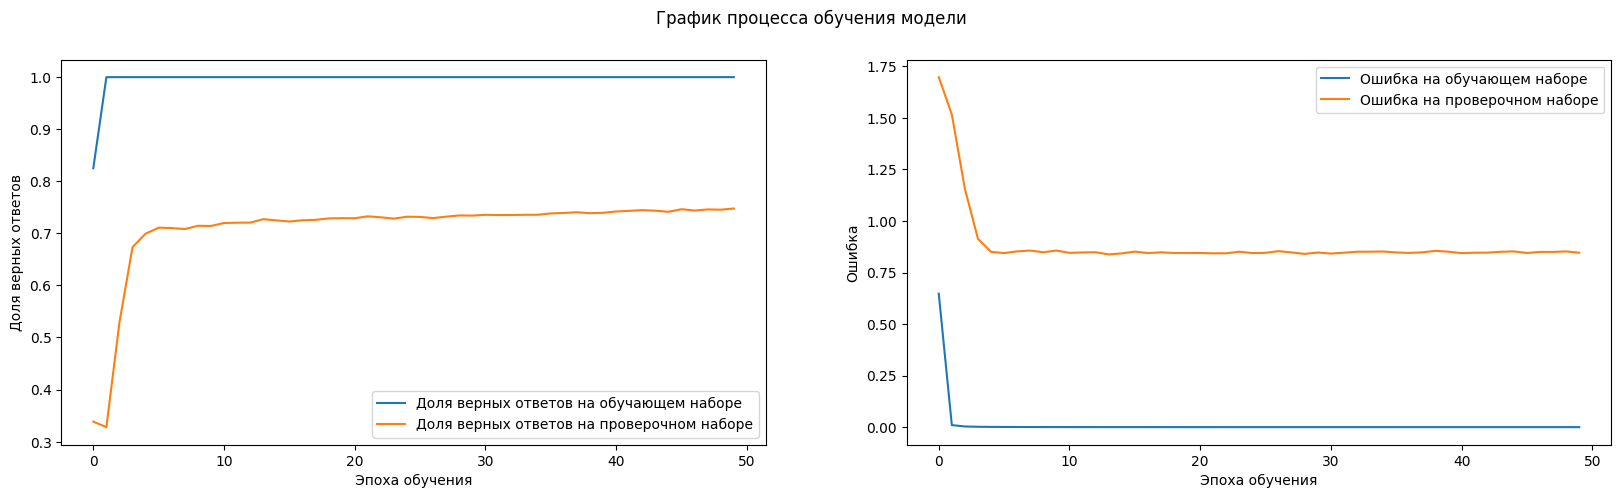

209/209 [==============================] - 0s 2ms/step


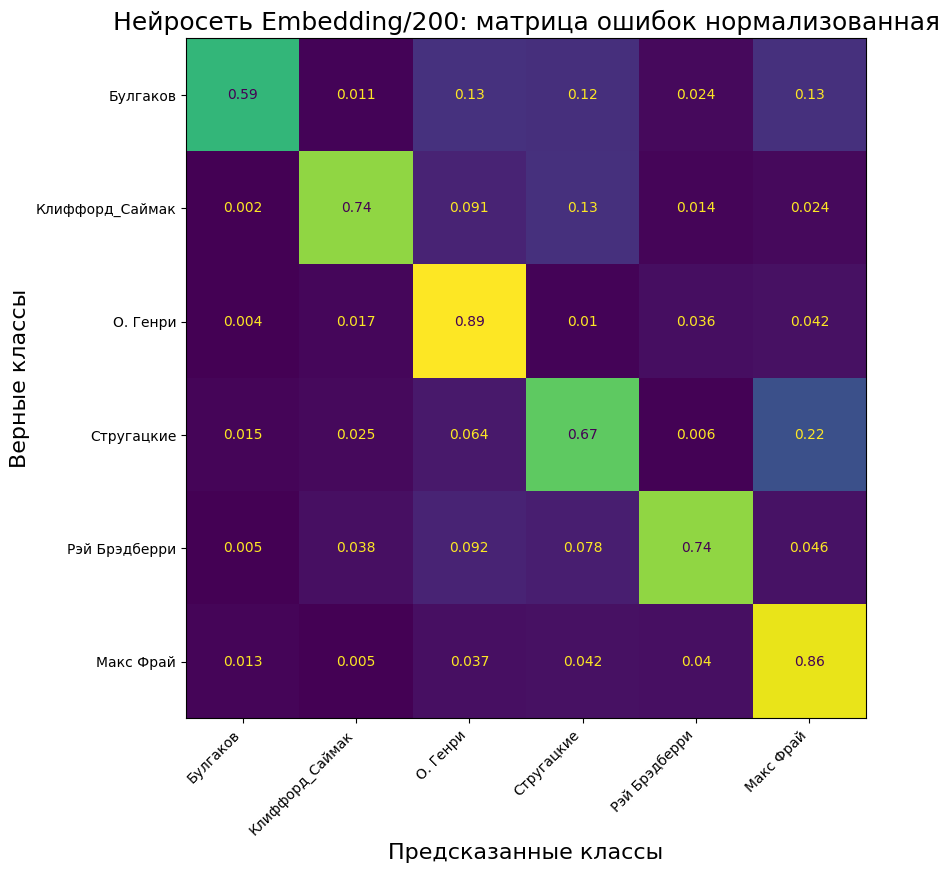

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding/200
Класс: Булгаков              59% сеть отнесла к классу Булгаков             - ВЕРНО :-)
Класс: Клиффорд_Саймак       74% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: О. Генри              89% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Стругацкие            67% сеть отнесла к классу Стругацкие           - ВЕРНО :-)
Класс: Рэй Брэдберри         74% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Макс Фрай             86% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)

Средняя точность распознавания:  75%


In [ ]:
#Создаём сеть с Embedding слоем
model_text_emb_200 = Sequential()
model_text_emb_200.add(Embedding(VOCAB_SIZE, 200, input_length=WIN_SIZE))
model_text_emb_200.add(SpatialDropout1D(0.2))
model_text_emb_200.add(Flatten())
model_text_emb_200.add(BatchNormalization())
model_text_emb_200.add(Dense(200, activation="relu"))
model_text_emb_200.add(Dropout(0.2))
model_text_emb_200.add(BatchNormalization())
model_text_emb_200.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_text_emb_200,
                         x_train, y_train,
                         x_test, y_test,
                         class_labels=CLASS_LIST,
                         title='Embedding/200')

Вывод по данной модели – везде плато на графиках, что нехорошо, и скорее всего модель столкнулась с переобучением. По сравнению с предыдущей моделью точность распознавания выросла на 5%, но это все равно гораздо меньше, чем точности при подходе с Bag Of Words. Похоже, что «мешок слов» – оптимальный способ решения задачи по классификации текстов?

Дайте Embedding-модели еще один шанс, убрав при этом слои регуляризации из архитектуры.

Embedding + Dense: размерность эмбеддингов 200 без слоев регуляризации SpatialDropout1D, Droupout

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 200)         4000000   
                                                                 
 flatten_2 (Flatten)         (None, 200000)            0         
                                                                 
 batch_normalization_5 (Bat  (None, 200000)            800000    
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 200)               40000200  
                                                                 
 batch_normalization_6 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 6)                

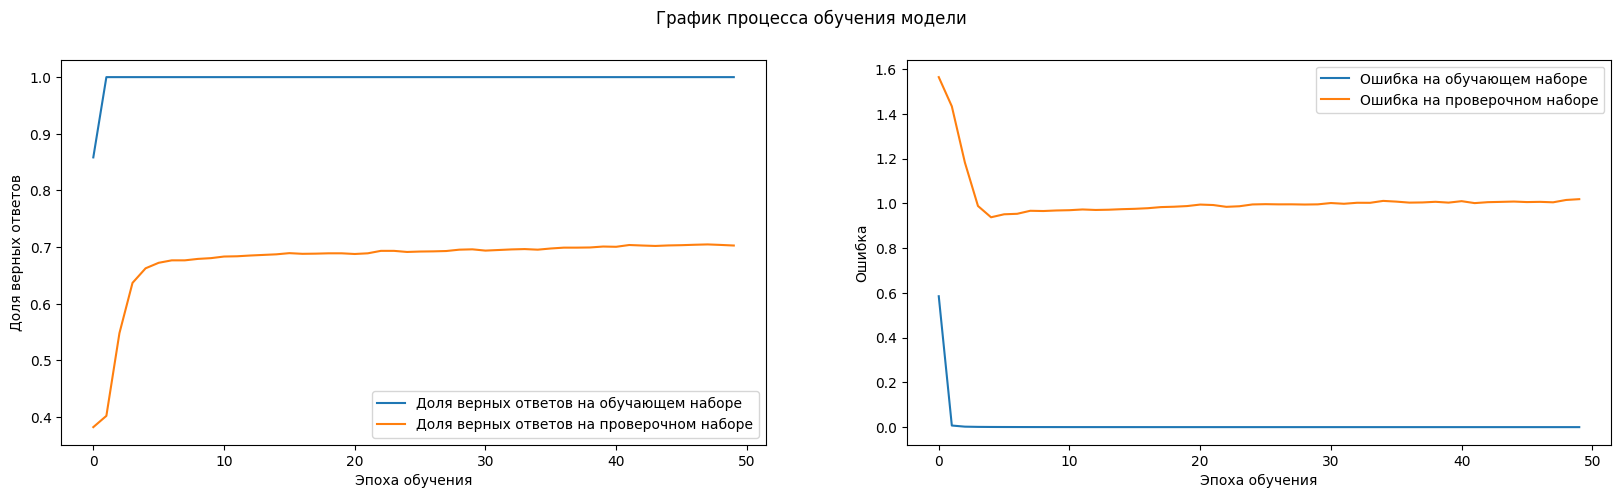

209/209 [==============================] - 1s 3ms/step


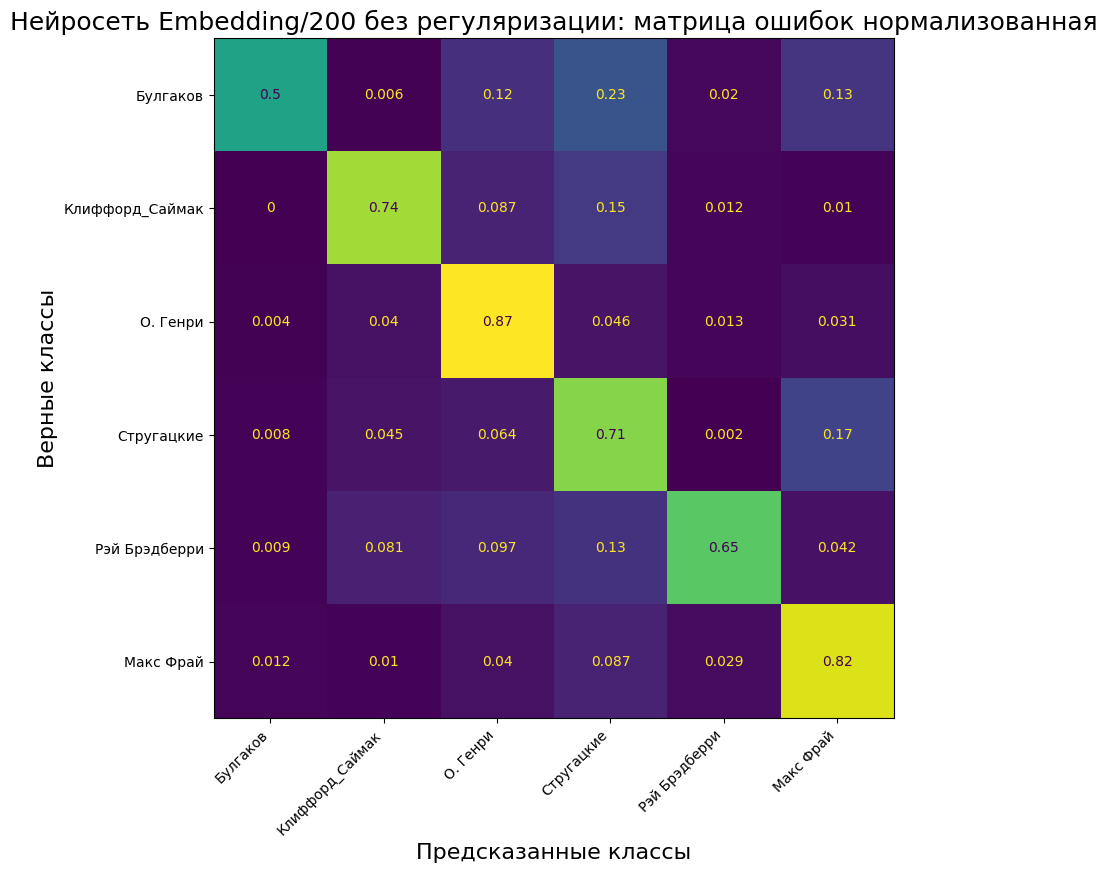

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding/200 без регуляризации
Класс: Булгаков              50% сеть отнесла к классу Булгаков             - ВЕРНО :-)
Класс: Клиффорд_Саймак       74% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: О. Генри              87% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Стругацкие            71% сеть отнесла к классу Стругацкие           - ВЕРНО :-)
Класс: Рэй Брэдберри         65% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Макс Фрай             82% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)

Средняя точность распознавания:  71%


In [ ]:
#Создаём сеть с Embedding слоем
model_text_emb_200_nr = Sequential()
model_text_emb_200_nr.add(Embedding(VOCAB_SIZE, 200, input_length=WIN_SIZE))
model_text_emb_200_nr.add(Flatten())
model_text_emb_200_nr.add(BatchNormalization())
model_text_emb_200_nr.add(Dense(200, activation="relu"))
model_text_emb_200_nr.add(BatchNormalization())
model_text_emb_200_nr.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_text_emb_200_nr,
                         x_train, y_train,
                         x_test, y_test,
                         class_labels=CLASS_LIST,
                         epochs=50,
                         title='Embedding/200 без регуляризации')

Увы! Точность последней модели совпала с точностью первой Embedding-сети, хотя параметр размера пространства здесь численно выше в 10 раз. Пусть 71% не самый плохой результат, но и графики обучения, и статистика по эпохам значительно уступают Bag Of Words-модели. Хорошо, что AI-разработчики придумали несколько подходов для задач по обработке текстов! То, что один подход сейчас лучше работает не означает, что он будет работать так же для любой задачи. Поэтому не забывайте экспериментировать, и тогда каждый подход найдет свою область применения!

 5 нейросеть, поэкспериментируем с Bag Of Words и изменим гиперпараметры и кол-во эпох

In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=25,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):
    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               4000200   
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 6)                 606       
                                                        

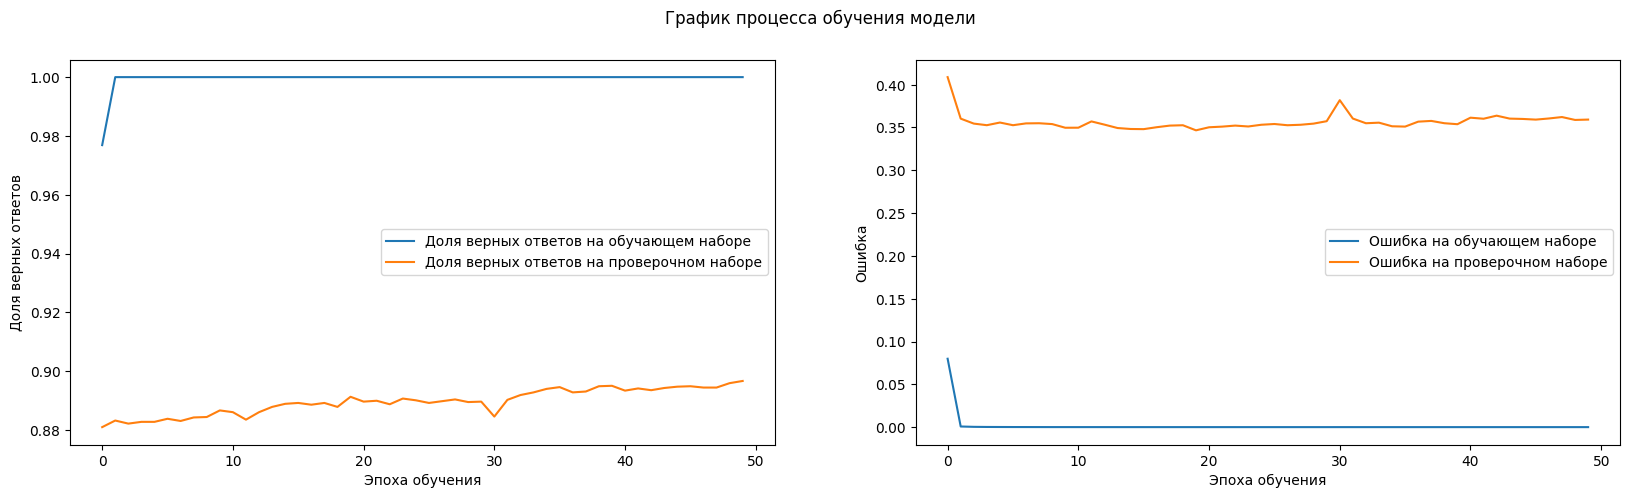

209/209 [==============================] - 1s 2ms/step


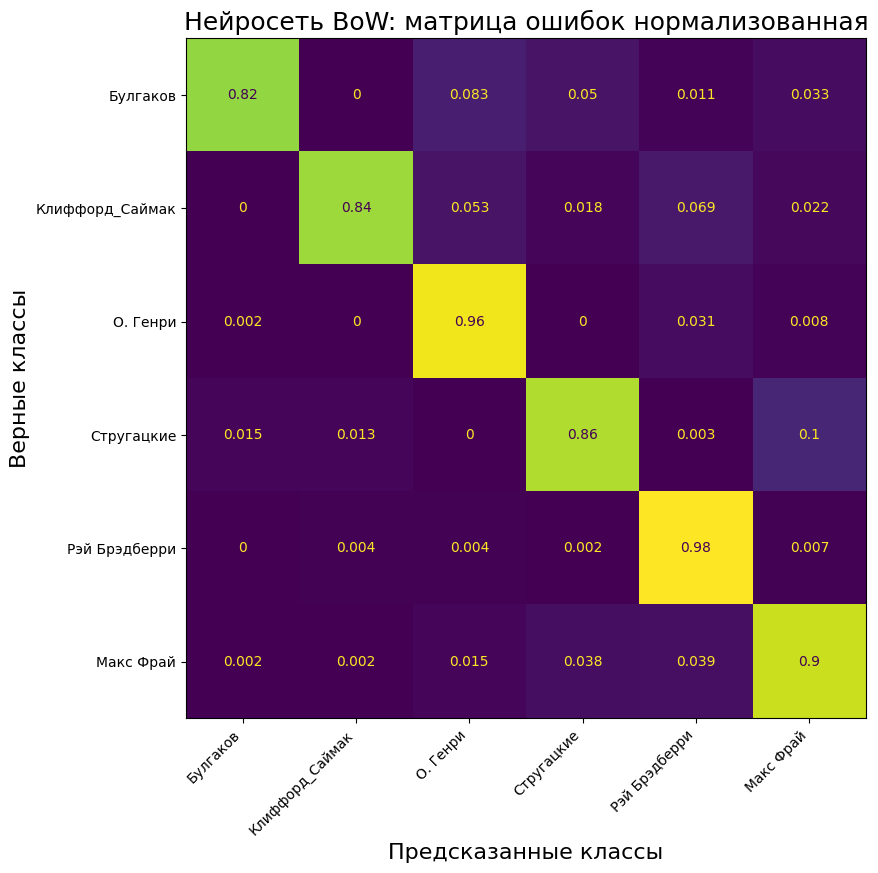

----------------------------------------------------------------------------------------------------
Нейросеть: BoW
Класс: Булгаков              82% сеть отнесла к классу Булгаков             - ВЕРНО :-)
Класс: Клиффорд_Саймак       84% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: О. Генри              96% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Стругацкие            86% сеть отнесла к классу Стругацкие           - ВЕРНО :-)
Класс: Рэй Брэдберри         98% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Макс Фрай             90% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)

Средняя точность распознавания:  90%


In [ ]:
# Создание последовательной модели нейросети
model_text_bow_softmax = Sequential()
# Первый полносвязный слой
model_text_bow_softmax.add(Dense(200, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.25))
# Слой пакетной нормализации
model_text_bow_softmax.add(BatchNormalization())
#Добавим второй полносвязный слой
model_text_bow_softmax.add(Dense(100, input_dim=VOCAB_SIZE, activation="relu"))
# Еще один слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.15))
# Выходной полносвязный слой
model_text_bow_softmax.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_softmax,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         class_labels=CLASS_LIST,
                         title='BoW')

Точность увеличилась. Попробуем еще.

6 нейросеть. Еще увеличим на 1 Dens-слой и восстановим количество эпох до 50.

In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=15,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):
    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 200)               4000200   
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 batch_normalization_2 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                      

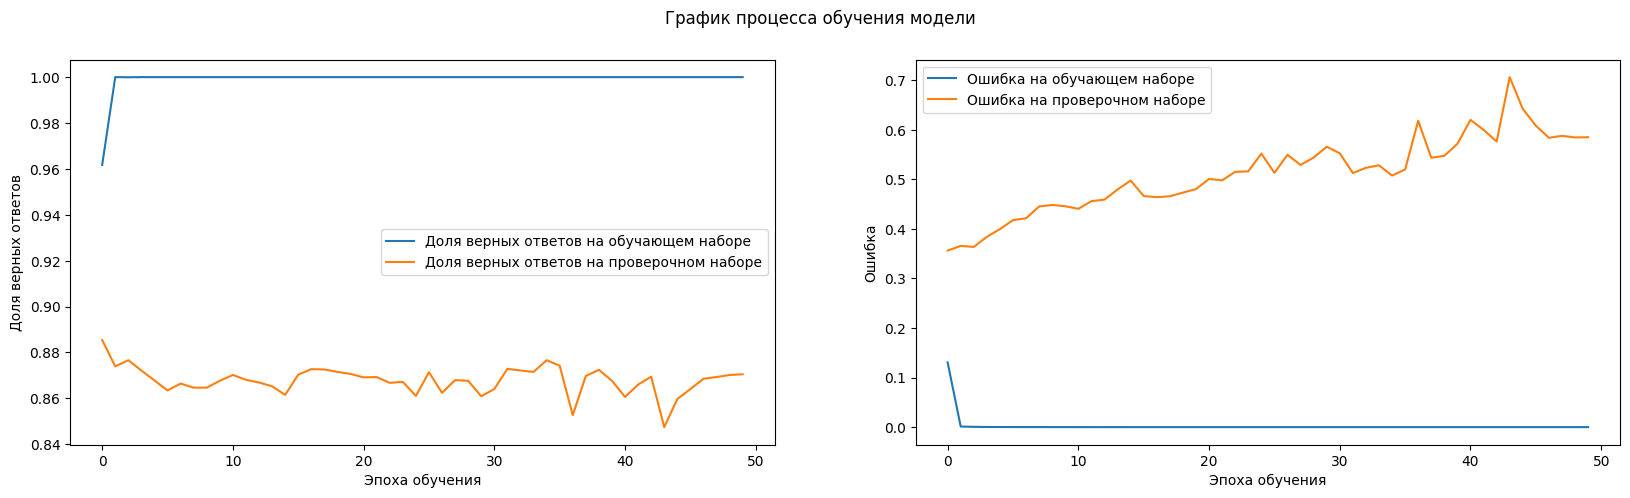

209/209 [==============================] - 1s 2ms/step


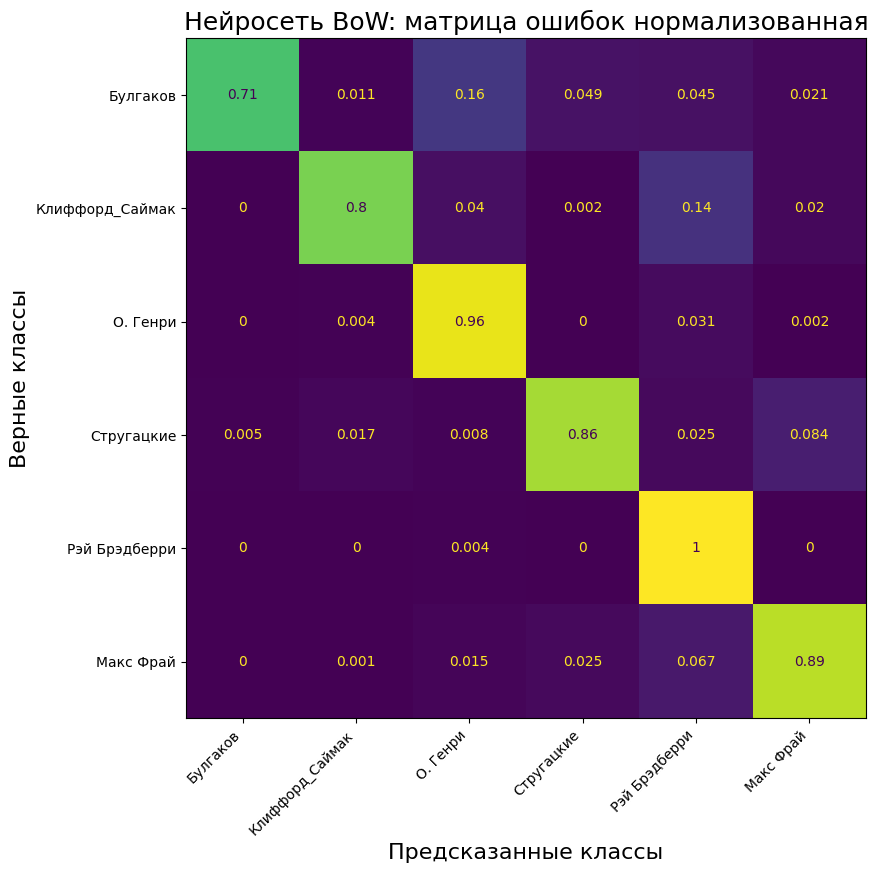

----------------------------------------------------------------------------------------------------
Нейросеть: BoW
Класс: Булгаков              71% сеть отнесла к классу Булгаков             - ВЕРНО :-)
Класс: Клиффорд_Саймак       80% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: О. Генри              96% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Стругацкие            86% сеть отнесла к классу Стругацкие           - ВЕРНО :-)
Класс: Рэй Брэдберри        100% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Макс Фрай             89% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)

Средняя точность распознавания:  87%


In [ ]:
# Создание последовательной модели нейросети
model_text_bow_softmax = Sequential()
# Первый полносвязный слой
model_text_bow_softmax.add(Dense(200, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.25))
# Слой пакетной нормализации
model_text_bow_softmax.add(BatchNormalization())
#Добавим второй полносвязный слой
model_text_bow_softmax.add(Dense(100, input_dim=VOCAB_SIZE, activation="relu"))
# Еще один слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.15))
#Добавляем еще один денс-слой
model_text_bow_softmax.add(Dense(50, input_dim=VOCAB_SIZE, activation="relu"))
# Еще один слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.10))
# Выходной полносвязный слой
model_text_bow_softmax.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_softmax,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         class_labels=CLASS_LIST,
                         title='BoW')

Результат ухудшился.

7 нейросеть уберем один слой дропаут.

In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=15,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):
    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 200)               4000200   
                                                                 
 dropout_8 (Dropout)         (None, 200)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 100)               20100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                      

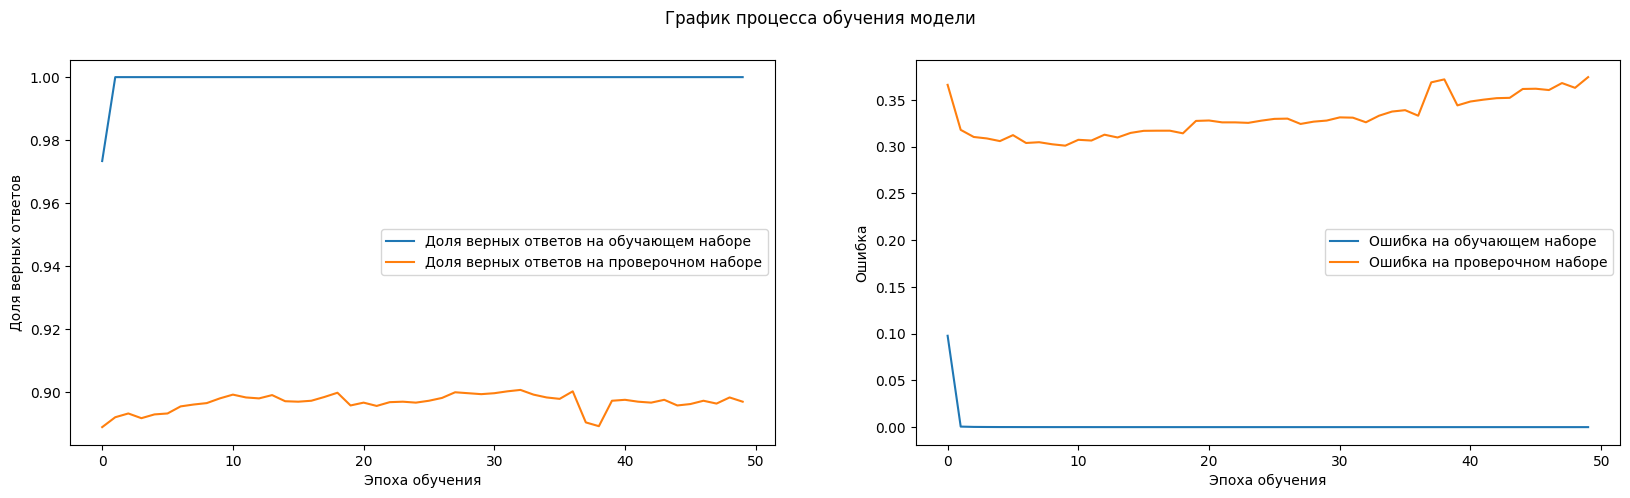

209/209 [==============================] - 1s 2ms/step


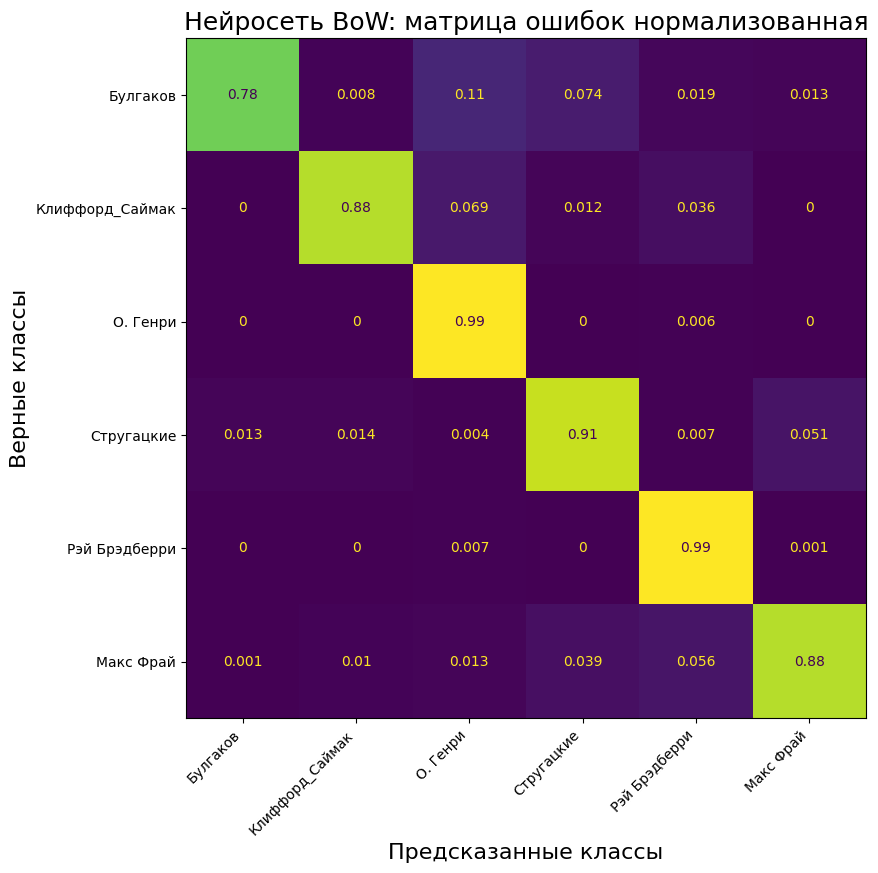

----------------------------------------------------------------------------------------------------
Нейросеть: BoW
Класс: Булгаков              78% сеть отнесла к классу Булгаков             - ВЕРНО :-)
Класс: Клиффорд_Саймак       88% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: О. Генри              99% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Стругацкие            91% сеть отнесла к классу Стругацкие           - ВЕРНО :-)
Класс: Рэй Брэдберри         99% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Макс Фрай             88% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)

Средняя точность распознавания:  91%


In [ ]:
# Создание последовательной модели нейросети
model_text_bow_softmax = Sequential()
# Первый полносвязный слой
model_text_bow_softmax.add(Dense(200, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.25))
# Слой пакетной нормализации
model_text_bow_softmax.add(BatchNormalization())
#Добавим второй полносвязный слой
model_text_bow_softmax.add(Dense(100, input_dim=VOCAB_SIZE, activation="relu"))
# Еще один слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.15))
#Добавляем еще один денс-слой
model_text_bow_softmax.add(Dense(50, input_dim=VOCAB_SIZE, activation="relu"))

# Выходной полносвязный слой
model_text_bow_softmax.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_softmax,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         class_labels=CLASS_LIST,
                         title='BoW')

In [ ]:
# Сохранение полной модели (архитектуры слоев и весов каждого слоя)
# Для чтения модели используется метод keras.models.load_model()
model_text_bow_softmax.save('model_text_bow_softmax.h5_2')

8 нейросеть. добавим слой нормализации.

In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=15,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=15,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):
    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 200)               4000200   
                                                                 
 dropout_10 (Dropout)        (None, 200)               0         
                                                                 
 batch_normalization_4 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                      

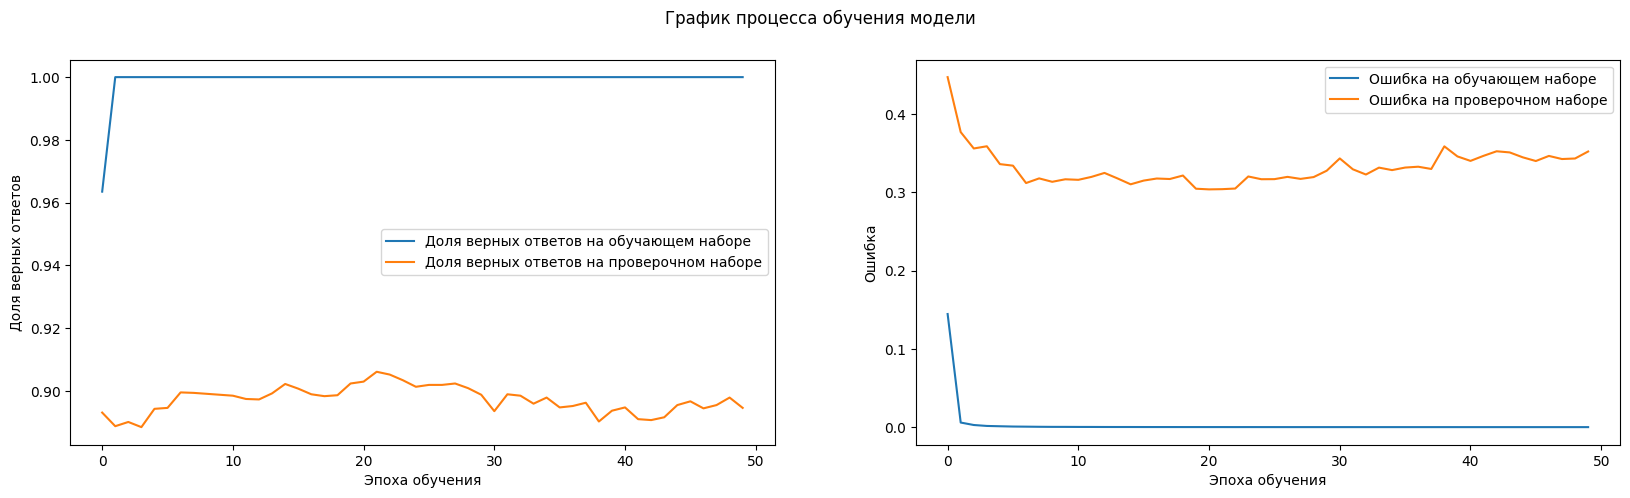

209/209 [==============================] - 1s 2ms/step


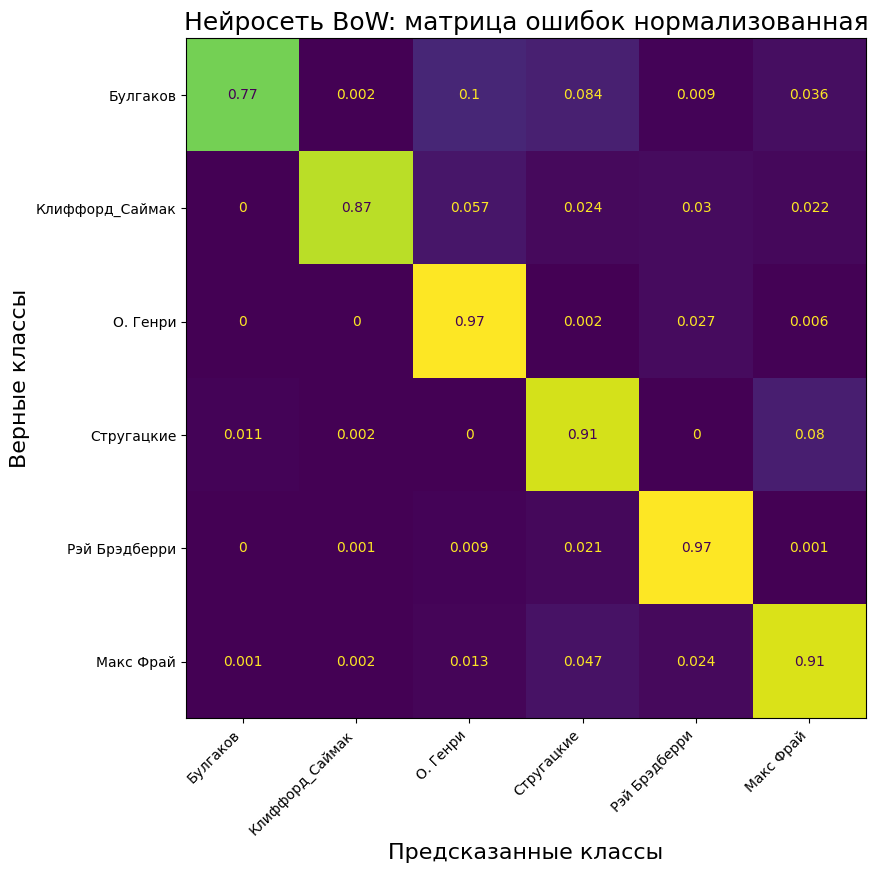

----------------------------------------------------------------------------------------------------
Нейросеть: BoW
Класс: Булгаков              77% сеть отнесла к классу Булгаков             - ВЕРНО :-)
Класс: Клиффорд_Саймак       87% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: О. Генри              97% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Стругацкие            91% сеть отнесла к классу Стругацкие           - ВЕРНО :-)
Класс: Рэй Брэдберри         97% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Макс Фрай             91% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)

Средняя точность распознавания:  90%


In [ ]:
# Создание последовательной модели нейросети
model_text_bow_softmax = Sequential()
# Первый полносвязный слой
model_text_bow_softmax.add(Dense(200, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.25))
# Слой пакетной нормализации
model_text_bow_softmax.add(BatchNormalization())
#Добавим второй полносвязный слой
model_text_bow_softmax.add(Dense(100, input_dim=VOCAB_SIZE, activation="relu"))
# Еще один слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.15))
#Добавляем еще один денс-слой
model_text_bow_softmax.add(Dense(50, input_dim=VOCAB_SIZE, activation="relu"))
# Слой пакетной нормализации
model_text_bow_softmax.add(BatchNormalization())
# Выходной полносвязный слой
model_text_bow_softmax.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_softmax,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         class_labels=CLASS_LIST,
                         title='BoW')

Уменишилась точность на один процент. Предыдущий результат был лучше.
9 нейросеть. добавляем дропаут.

In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=20,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=20,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):
    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 200)               4000200   
                                                                 
 dropout_12 (Dropout)        (None, 200)               0         
                                                                 
 batch_normalization_6 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 100)               20100     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 50)                5050      
                                                      

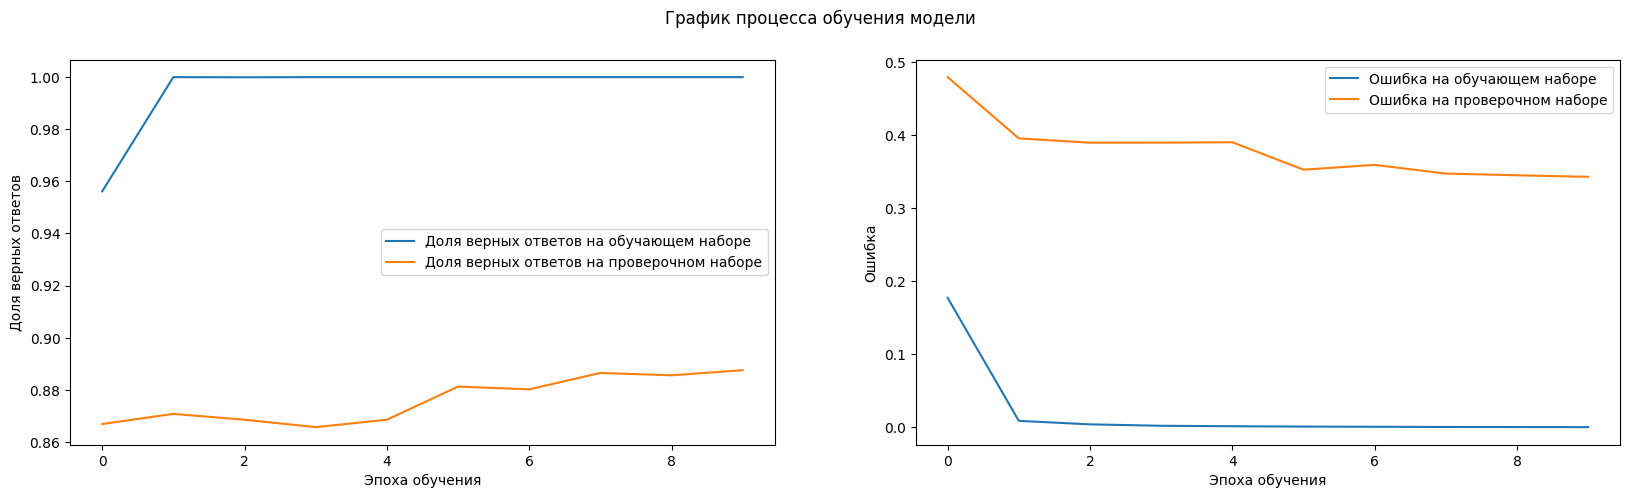

209/209 [==============================] - 1s 2ms/step


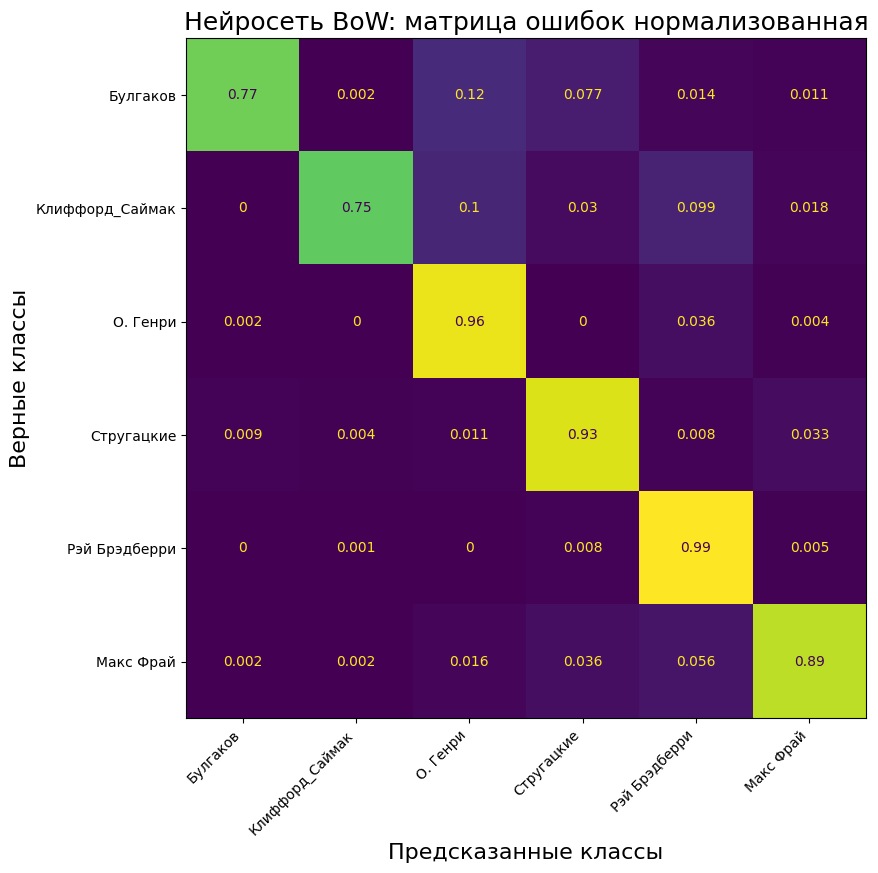

----------------------------------------------------------------------------------------------------
Нейросеть: BoW
Класс: Булгаков              77% сеть отнесла к классу Булгаков             - ВЕРНО :-)
Класс: Клиффорд_Саймак       75% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: О. Генри              96% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Стругацкие            93% сеть отнесла к классу Стругацкие           - ВЕРНО :-)
Класс: Рэй Брэдберри         99% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Макс Фрай             89% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)

Средняя точность распознавания:  88%


In [ ]:
# Создание последовательной модели нейросети
model_text_bow_softmax = Sequential()
# Первый полносвязный слой
model_text_bow_softmax.add(Dense(200, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.25))
# Слой пакетной нормализации
model_text_bow_softmax.add(BatchNormalization())
#Добавим второй полносвязный слой
model_text_bow_softmax.add(Dense(100, input_dim=VOCAB_SIZE, activation="relu"))
# Еще один слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.15))
#Добавляем еще один денс-слой
model_text_bow_softmax.add(Dense(50, input_dim=VOCAB_SIZE, activation="relu"))
# Еще один слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.10))
# Слой пакетной нормализации
model_text_bow_softmax.add(BatchNormalization())
# Выходной полносвязный слой
model_text_bow_softmax.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_softmax,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         class_labels=CLASS_LIST,
                         title='BoW')